## Step 3: Postprocessing: analyze fit results

Import some packages, create some folders. <br> Start this script in the target's main directory (workingdir+'/'+sourcetag) from Step 1.

In [29]:
import pickle
import matplotlib.pyplot as pl
import numpy as np
import corner
import os
import matplotlib

#Start from target's main directory from Step 1
workingdir = '/Users/jonty/mydata/stirred_discs'
sourcetag  = 'hd16743_freeh'
os.chdir(workingdir + '/' + sourcetag)

#Read in directories as defined in step 1
miaopath, casapath, sourcetag, workingdir, vis, nvis = pickle.load(open('./dirvises.npy','rb'))
os.chdir('./uvfit')

for i in ['plots', 'uvfit/evaluation']:
    if not os.path.exists(workingdir+'/'+sourcetag+'/'+i):
        os.mkdir(workingdir+'/'+sourcetag+'/'+i)
!cp -r {miaopath}/utils/maketraceandcornerplot.py {workingdir}/{sourcetag}/uvfit/. 
!cp -r {miaopath}/utils/uvresidualtoms.py {workingdir}/{sourcetag}/uvfit/. 
!cp -r {miaopath}/utils/makeuvdeprojplot_simple_multiple.py {workingdir}/{sourcetag}/uvfit/.

Read in results from MCMC visibility fitting through emcee sampler, read from backend as defined in Step 2. 

In [53]:
newbackend=False
backendaddress='backend_'+sourcetag+'_todaysdate_computersname_v3.pkl'
pickle.dump([newbackend, backendaddress], open('backendoptions.npy', 'wb'), protocol=2)

rmin_arcsec, rmax_arcsec, nr = pickle.load(open('./gridparams.npy','rb'))
%run setup_mcmc

#Read in chain
chain=backend.get_chain()

Radial grid of model goes from 1.0 au to 463.2 au, with 100 radial steps, and step size of 0.07982728842832469 arcsec
Setting up sampler...


If necessary, remove some walkers that got stuck in unreasonable regions of parameter space (e.g. if they were accidentally started beyond prior boundaries)

In [54]:
good = np.where(10**chain[-1,:,1] > 180)

#print(chain[-1,:,:])
#print(chain.shape)
#print(chain[good])

print(np.where(chain[-1,:,0] > 0.0015))

chain=np.delete(chain, np.where(chain[-1,:,0] >= 0.0015), axis=1)

print(chain.shape)

#chain=np.delete(chain, np.where(chain[600,:,8]<=0.25e-3), axis=1)
#chain=np.delete(chain, np.where(chain[750,:,8]<=0.25e-3), axs=1)

(array([8]),)
(1000, 99, 10)


Decide how long the burn-in phase should be, and what the titles of the plots should be. Produce the plots!

Changing units for plotting
Setting labels for ndim parameters
NB: Code is assuming that you chose the end of burn-in phase correctly.


/Users/jonty/mydata/stirred_discs/hd16743_freeh/uvfit/maketraceandcornerplot.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(cornername+'.pdf')
/Users/jonty/mydata/stirred_discs/hd16743_freeh/uvfit/maketraceandcornerplot.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(cornername+'_small.pdf')
/Users/jonty/mydata/stirred_discs/hd16743_freeh/uvfit/maketraceandcornerplot.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(cornername+'_small.pdf')


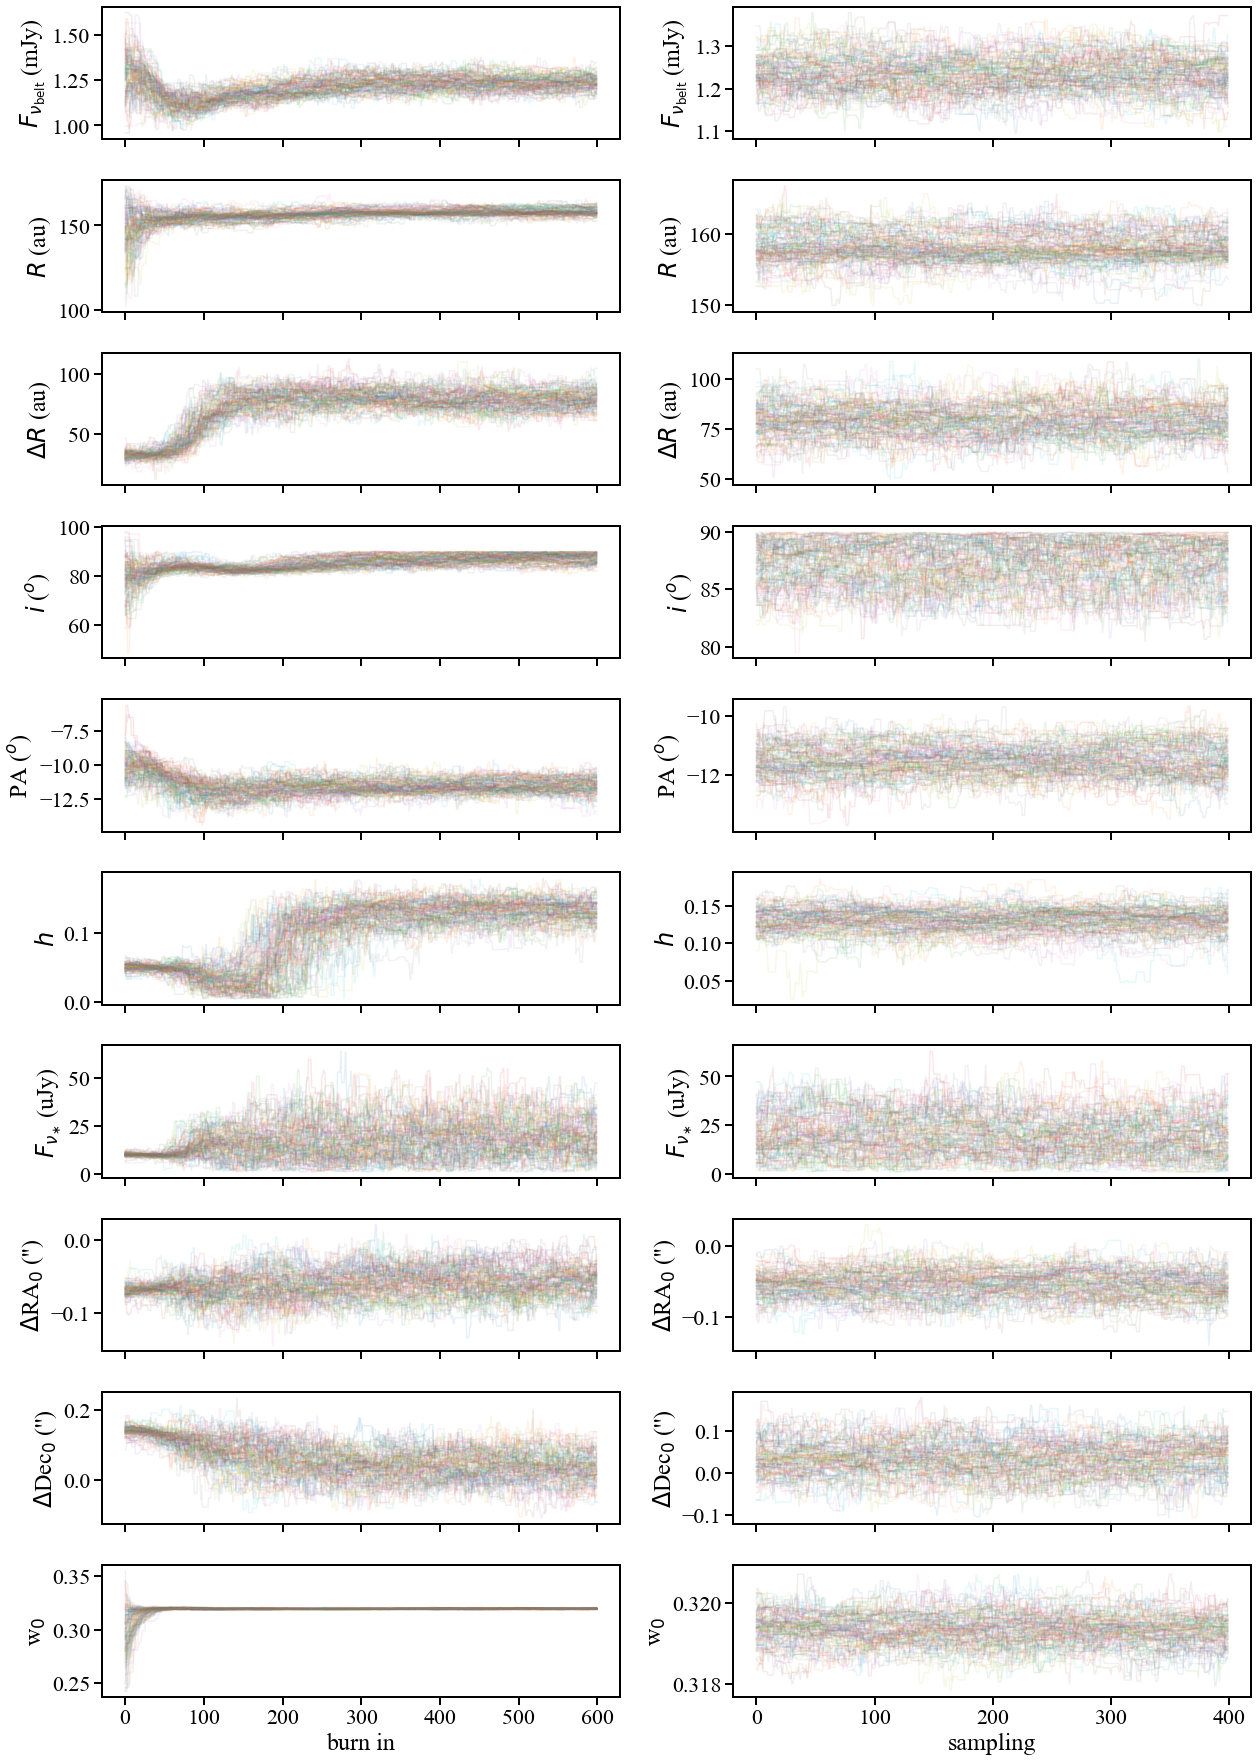

/Users/jonty/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


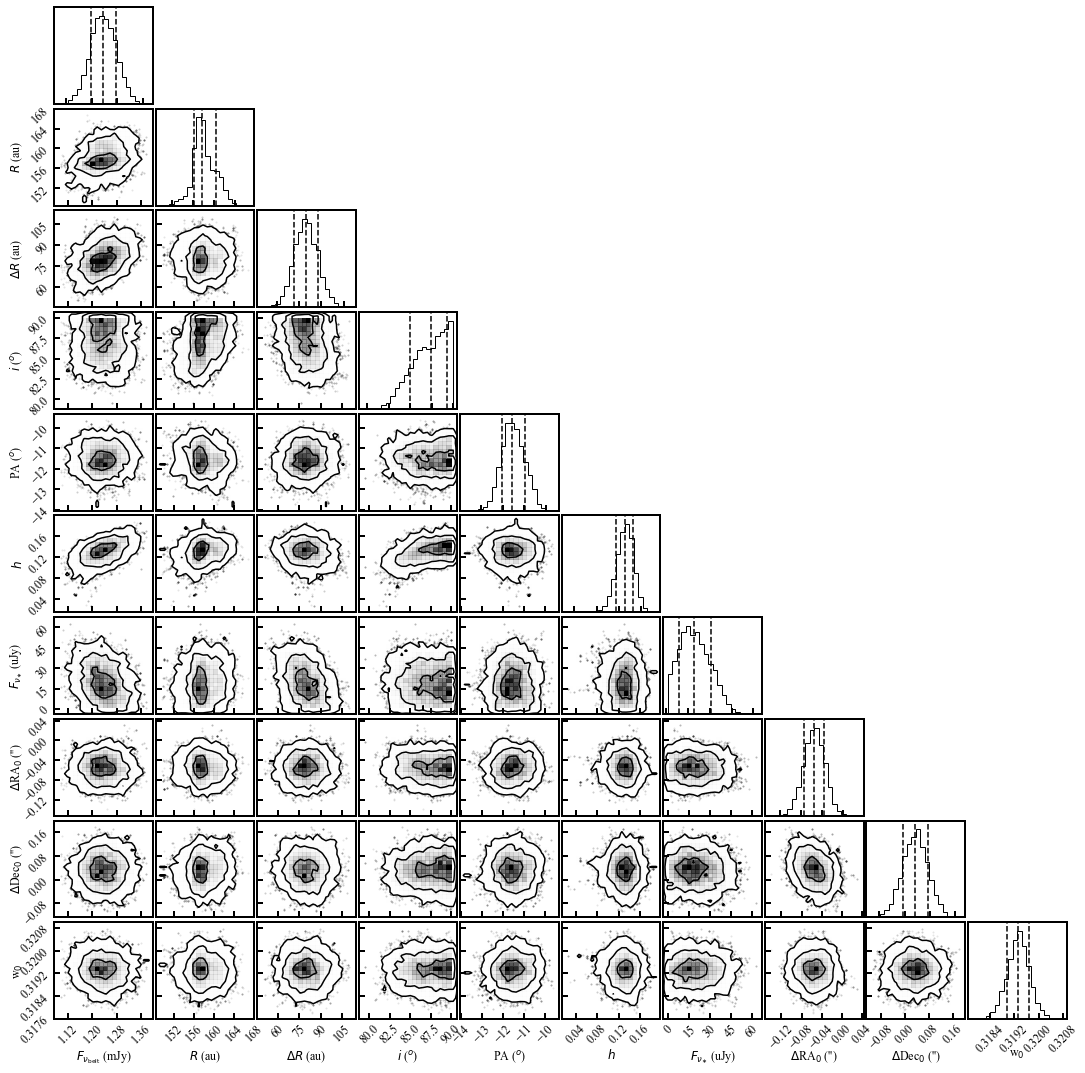

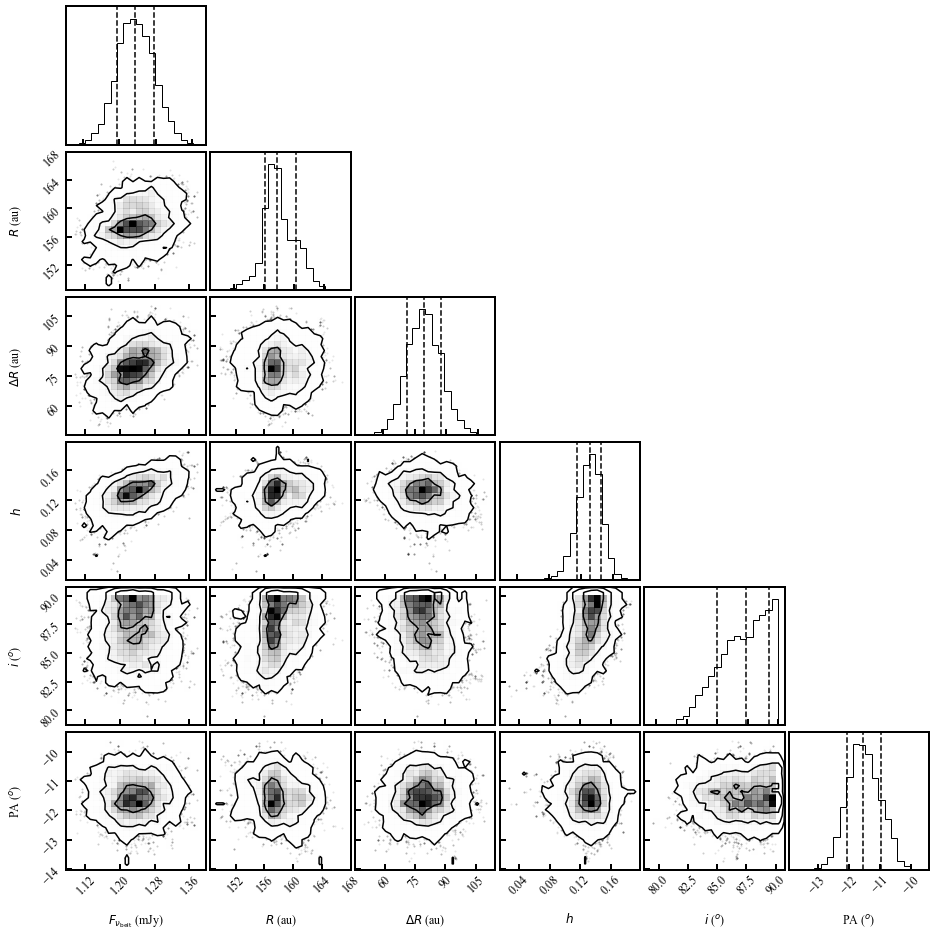

In [55]:
burnin=600

cornername='./evaluation/triangle_'+sourcetag+'_cont'
traceplotname='./evaluation/traceplot_'+sourcetag+'_cont'
pickle.dump([burnin, cornername, traceplotname, chain], open('traceandcornerinputs.npy', 'wb'), protocol=2)

%run maketraceandcornerplot.py
!cp -r ./evaluation/tr* ../plots/.

Now figure out best-fit parameters and upper and lower 1sigma boundaries for every parameter. <br>
These are taken, respectively, as the 50th, 16th, and 84th percentiles of the distributions - which is only good if the
distributions look single- and centrally peaked. If not, it's up to you to modify the values and report parameters as lower or upper limits in your paper!

In [56]:
pbest=list(map(lambda v: (v[1]), zip(*np.percentile(samples, [16,50,84], axis=0))))
pbest1up=list(map(lambda v: (v[2]), zip(*np.percentile(samples, [16,50,84], axis=0))))
pbest1dwn=list(map(lambda v: (v[0]), zip(*np.percentile(samples, [16,50,84], axis=0))))
for i in np.arange(len(pbest)):
    print(labelparams[i],"{:.4f}".format(pbest[i]), "+{:.4f}".format(pbest1up[i]-pbest[i]), "-{:.4f}".format(pbest[i]-pbest1dwn[i]))


$F_{\nu_{\rm belt}}$ (mJy) 1.2349 +0.0417 -0.0392
$R$ (au) 157.7316 +2.6390 -1.5321
$\Delta R$ (au) 79.4089 +8.1210 -7.7774
$i$ ($^{o}$) 87.3851 +1.8710 -2.4185
PA ($^{o}$) -11.5521 +0.5786 -0.4938
$h$ 0.1311 +0.0140 -0.0158
$F_{\nu_{\ast}}$ (uJy) 18.8802 +12.2041 -10.1454
$\Delta$RA$_0$ ('') -0.0549 +0.0195 -0.0198
$\Delta$Dec$_0$ ('') 0.0341 +0.0402 -0.0404
w$_0$ 0.3193 +0.0004 -0.0004


(Re-)Produce best-fit model image and visibilities given best fit parameters, quick-check and save image

<radmc3dPy.image.radmc3dImage object at 0x7fc2b93f5c70> <radmc3dPy.image.radmc3dImage object at 0x7fc2b93f5c70>


/Users/jonty/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


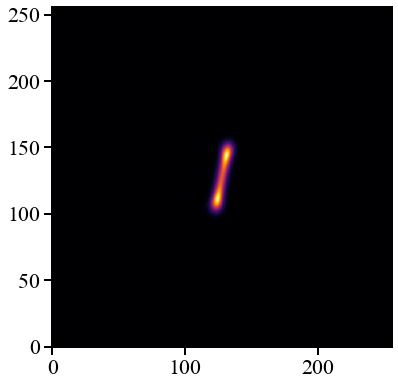

In [6]:
#First turn back to native units from plotting units
pbestformodel=np.asarray(pbest).copy()
pbestformodel[[x for x in range(len(labels)) if labels[x]=='fnu'][0]]/=1e3
if star:
    pbestformodel[[x for x in range(len(labels)) if labels[x]=='fnustar'][0]]/=1e6
pbestformodel[[x for x in range(len(labels)) if labels[x]=='r'][0]]/=dist
pbestformodel[[x for x in range(len(labels)) if labels[x]=='sigr'][0]]/=dist*2.0*np.sqrt(2.0*np.log(2.0))
if pachange:
    pbestformodel[[x for x in range(len(labels)) if labels[x]=='pa'][0]]-=180.0
#Recreate image, obtain model's log-likelihood
locmodelvis='./evaluation'
modelim, pxsz, lnL = lnpostfn(pbestformodel, locmodelvis)
#Quick check of model image
pl.figure(figsize=(6,6))
pl.imshow(modelim, origin='lower', cmap='inferno')
#Save best-fit model image, and its pixel size, for later plotting
np.save('./evaluation/'+sourcetag+'_material_modelim.npy', [modelim, pxsz], allow_pickle=True)

Now make deprojected real and imaginary visibility plots with data vs model. <br>
Remember to define your plot parameters appropriately below.

/Users/jonty/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


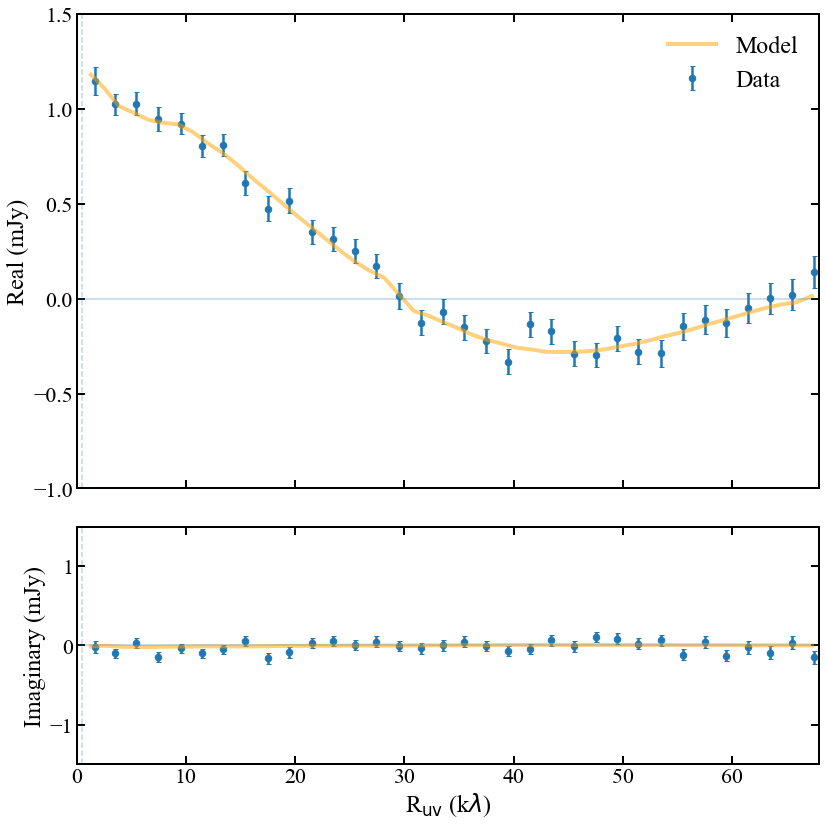

In [7]:
#Import routine
import makeuvdeprojplot_simple_multiple
import importlib
importlib.reload(makeuvdeprojplot_simple_multiple)
#Set weight factor for proper error bars
warr=np.load('./evaluation/warr.npy')

#Provide location of visibilities for data, model, PA, inc and best-fit offset parameters for each dataset (which we will use
#to realign datasets). Normally you should NOT need to change these locations as they are standardised
datavisloc=['../calibratedms/'+vis[i][:-3]+'.npy' for i in np.arange(nvis)]
modelvisloc=[locmodelvis+'/'+sourcetag+'_uvtable_model'+str(i)+'.npy' for i in np.arange(nvis)]
paradoffsetloc=[locmodelvis+'/bestfitshiftPAinc_rad'+str(i)+'.npy' for i in np.arange(nvis)]

#Do you want to phase shift data, model and residual datasets so star+disk are centered at the phase center of 
#each observation? NOTE: if observation is a mosaic, and offsets are defined with respect to the star (rather than
#each pointing center) this should be turned OFF.
phaseshift=True

#Maximum u-v distance to plot
uvmax=68.e3
#Bin size of u-v bins
uvbin_size=2e3
#Lower and upper limit of Real part plot
ylimreal=[-1,1.5] #Limits on y axis in mJy
#Lower and upper limit of Imaginary part plot
ylimimag=[-1.5,1.5] #Limits on y axis in mJy
#Name of output plot
outfile='./evaluation/'+sourcetag+'_deprojvis.pdf'

#Execute plot.
uvbins, uvbins_mod, bin_re, bin_re_err, bin_re_modfine, bin_im, bin_im_err, bin_im_modfine = makeuvdeprojplot_simple_multiple.makeuvdeprojplot(datavisloc, modelvisloc, paradoffsetloc, uvmax, uvbin_size, warr, ylimreal, ylimimag, outfile, sourcetag, phaseshift)
#Save output for later plotting.
np.save('./evaluation/'+tag+'_material_uvplot.npy', [uvbins, uvbins_mod, bin_re, bin_re_err, bin_re_modfine, bin_im, bin_im_err, bin_im_modfine, ylimreal, ylimimag, uvmax], allow_pickle=True)

And finally, use CASA to produce model (noiseless) and residual MS files and dirty images. <br>
Additionally, produce a reweighted and phase shifted dataset - this may improve the original imaging particularly if you
had multiple datasets with wildly different weight rescaling factors, and with large spatial offsets from the phase 
center.

In [21]:
!{casapath}/casa -c uvresidualtoms.py


Using user-supplied startup.py at ~/.casa/startup.py

]0;IPython: hd16743_freeh/uvfitUsing matplotlib backend: MacOSX
Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False
--> CrashReporter initialized.
imported casatasks and casatools individually
CASA 6.5.2.26 -- Common Astronomy Software Applications [6.5.2.26]
Processing dataset hd16743_calibrated_merged.ms
Done! _res, _model, and _rwdat CASA MS files have been produced and placed in the ../../calibratedms directory


As in the imaging tutorial, decide on parameters that you want for CASA imaging through tclean. See CASA tclean documentation for more info.
By default, we will produce images with pixel and image sizes chosen according to the u-v distances covered in the dataset (see later). Multiscale deconvolution will be used.

In [22]:
os.chdir('evaluation')
# Take the same imaging parameters as used for initial images
sourcetag,workingdir,vis,nvis,mosaic,phasecenter,weighting,robust,uvtaper,interactive = pickle.load(open('../../imaging/imagepars.npy','rb'))

# Change anything you want, if you want
# weighting='briggs'
# robust=0.5
interactive=False

visrwdat=[[] for x in vis]
vismodel=[[] for x in vis]
visresidual=[[] for x in vis]
for i in range(nvis):
    visrwdat[i]=sourcetag+'_calibratedvis_cont_'+str(i)+'_rwdat.ms'
    vismodel[i]=sourcetag+'_calibratedvis_cont_'+str(i)+'_model.ms'
    visresidual[i]=sourcetag+'_calibratedvis_cont_'+str(i)+'_res.ms'

#Image reweighted and phase shifted data
pickle.dump([sourcetag,workingdir,visrwdat,nvis,mosaic,phasecenter,weighting,robust,uvtaper,interactive], open('./imagepars.npy', 'wb'), protocol=2)
!{casapath}/casa -c ../../imaging/imagingscript_multiple.py

#Image model
pickle.dump([sourcetag,workingdir,vismodel,nvis,mosaic,phasecenter,weighting,robust,uvtaper,interactive], open('./imagepars.npy', 'wb'), protocol=2)
!{casapath}/casa -c ../../imaging/imagingscript_multiple.py

#Image residuals
pickle.dump([sourcetag,workingdir,visresidual,nvis,mosaic,phasecenter,weighting,robust,uvtaper,interactive], open('./imagepars.npy', 'wb'), protocol=2)
!{casapath}/casa -c ../../imaging/imagingscript_multiple.py


Using user-supplied startup.py at ~/.casa/startup.py

]0;IPython: uvfit/evaluationUsing matplotlib backend: MacOSX
Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False
--> CrashReporter initialized.
imported casatasks and casatools individually
CASA 6.5.2.26 -- Common Astronomy Software Applications [6.5.2.26]
../../imaging/imagingscript_multiple.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  robusttask=np.float(robust)
rm: hd16743_freeh_calibratedvis_cont_0_rwdat_briggs0.5.*: No such 

Now check the residuals (_ res), the model (_ model) and the reweighted+phase shifted data (_ rwdat)

In [23]:
!{casapath}/casaviewer

Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False
--> CrashReporter initialized.


If you're happy with the results, time to prepare some plots for the paper in the next tutorial (Step 4)!